In [3]:
import pandas as pd # for data manipulation and analysis
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization


In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # for implementing decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # for implementing random forest algorithm
from sklearn.linear_model import LogisticRegression # for implementing logistic regression algorithm
from sklearn.neighbors import KNeighborsClassifier # for implementing K-Nearest Neighbors (KNN)  algorithm


In [6]:
df= pd.read_csv(r'C:\Users\USER\Desktop\Hackathon\complete data.csv')

In [7]:
df.columns

Index(['Curvature', 'Flow', 'NDWI', 'Precipitation', 'Slope', 'Landslide'], dtype='object')

In [8]:
y = df["Landslide"]


In [9]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1207    1
1208    1
1209    1
1210    1
1211    1
Name: Landslide, Length: 1212, dtype: int64

In [10]:
X = df[["Curvature", "Flow", "NDWI", "Precipitation", "Slope"]]

In [11]:
X

,Curvature,Flow,NDWI,Precipitation,Slope
0,3,2,2,3,2
1,5,1,2,5,2
2,4,2,2,5,2
3,3,5,4,5,3
4,4,4,4,3,4
...,...,...,...,...,...
1207,2,2,5,2,2
1208,5,3,5,2,5
1209,4,2,3,2,5
1210,2,1,1,1,3


In [13]:
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [14]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (848, 5)
y_train -  (848,)
X_test -  (364, 5)
y_test -  (364,)


In [15]:
linear_reg = LinearRegression()

#Train the model
linear_reg.fit(X_train,y_train)

#Make predictions on the test set
predictions = linear_reg.predict(X_test)

#Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:",mse)


Mean Squared Error: 0.203110687041502


Decision Accuracy: 0.6419753086419753


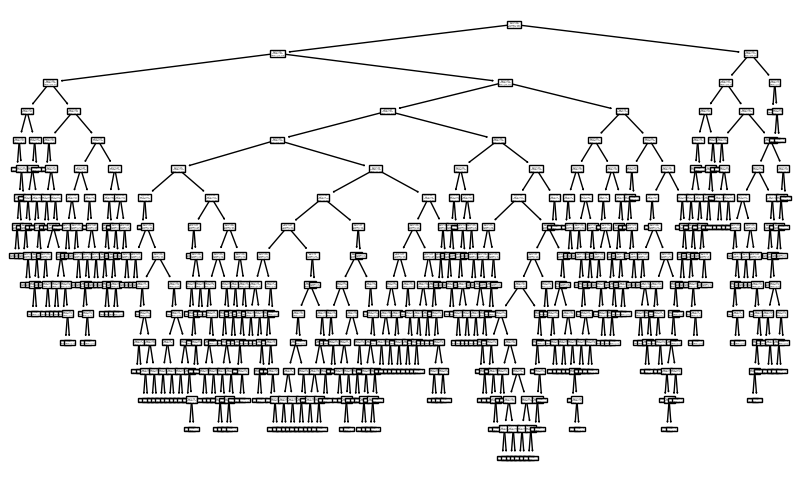

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Create a Decision Tree Classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

#Train the model
dt_classifier.fit(X_train,y_train)

#Make predictions on the test set
predictions = dt_classifier.predict(X_test)

#Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Decision Accuracy:",accuracy)

#PLot the decision tree
plt.figure(figsize=(10,6))
plot_tree(dt_classifier)
plt.show()


In [25]:
from sklearn.neighbors import KNeighborsClassifier

#Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

#Train the model
knn_classifier.fit(X_train, y_train)

#Make the predictions on test set
predictions = knn_classifier.predict(X_test)

#Calculate the accuracy store
accuracy = accuracy_score(y_test, predictions)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.6502057613168725


In [23]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

#Train the model
gnb.fit(X_train, y_train)

#Make predictions on the test set
predictions = gnb.predict(X_test)

#Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.717032967032967


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Random Forest model training
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict from the test set
y_pred = random_forest.predict(X_test)

# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print('Accuracy: {0:0.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('AUC: {0:0.5f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Precision: {0:0.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {0:0.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {0:0.5f}'.format(metrics.f1_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       188
           1       0.69      0.74      0.71       176

    accuracy                           0.71       364
   macro avg       0.71      0.71      0.71       364
weighted avg       0.71      0.71      0.71       364

Accuracy: 0.71154
AUC: 0.71240
Precision: 0.68783
Recall: 0.73864
F1: 0.71233


In [17]:
import pickle
from sklearn.ensemble import RandomForestClassifier


# Save the Random Forest model as a pickle file
filename = 'random_forest_model.pkl'
pickle.dump(random_forest, open(filename, 'wb'))

print("Random Forest model exported as pickle file:", filename)

Random Forest model exported as pickle file: random_forest_model.pkl
